In [30]:
# univariate lstm example
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras import optimizers

In [34]:
df = pd.read_csv("pc_1770.csv")

In [35]:
df = df['Product_Demand']

In [36]:
df

0       2
1       1
2      10
3       1
4       2
       ..
473     3
474     1
475    11
476     2
477     1
Name: Product_Demand, Length: 478, dtype: int64

In [37]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [38]:
# define input sequence
timeseries_data = df.to_numpy()
# choose a number of time steps
n_steps = 100
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [39]:
print(X),print(y)

[[ 2  1 10 ... 30  1  2]
 [ 1 10  1 ...  1  2  5]
 [10  1  2 ...  2  5  3]
 ...
 [10  2  4 ...  5  3  1]
 [ 2  4  2 ...  3  1 11]
 [ 4  2  2 ...  1 11  2]]
[ 5  3 10  5  1  1  4  2  2  1 10  1  2  5 10  5  1  2  2  1  2  1  1 10
  9  1  2  5  3  1  1 10  2  2  1  1  1  1  1  4  1  1  2 10  1  2  1  3
  2  3  1  6  2  3  1  2 10  3  2  2  3  1 10  2  1  1  2  1  2 10  6  3
  1  1  2  1 10  2 30  9 10  3  2  1 10  4  1  2  2  1  2  1  1 10  1  1
  2  3  5  1  1  1  1  2  1 10  2 10  1  2 10  3  2  1  2  1  1 10  1  1
 30  2  4  1  2  2  5  2  5 10  2  1  3  1  2  1  3  1  4  5  1  2  1 10
  2  2  1  4  2 10  1  1 10  1  1  1  1  1 10  2  1  2  2 10  2  1  1  2
  1 24  6  2 10  2  2  1  1  5  1 20 10  4  1 10  1 10  2  5 10  2  1  2
 10  1  1  1  1  1  1 10 10  1  1 30  1  1  8 12  2  1  1  4  2  2  1  1
  1  1 10  1  1  6 10  3  1  5  3  1  2  1  4 10  1  1  4  1 10  2  3  1
 10  1  1  1  1  1  3  1  2  1  5  3 12  2  3  1  1 11  2  3 20  1  2 10
  1  5  3  1  1  1  2  5  1  3 12 10  2  

(None, None)

In [40]:
X.shape

(378, 100)

In [41]:
# choose a number of time steps
n_steps = 100
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 1
n_steps = 100
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [42]:
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1, activation='relu'))
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mse')

In [43]:
# fit model
model.fit(X, y, epochs=150, verbose=1)

Train on 378 samples
Epoch 1/150
378/378 [==============================] - 3s 8ms/sample - loss: 24.2884
Epoch 2/150
378/378 [==============================] - 0s 1ms/sample - loss: 20.4512
Epoch 3/150
378/378 [==============================] - 0s 1ms/sample - loss: 19.7058
Epoch 4/150
378/378 [==============================] - 0s 1ms/sample - loss: 19.1332
Epoch 5/150
378/378 [==============================] - 1s 1ms/sample - loss: 18.7445
Epoch 6/150
378/378 [==============================] - 1s 1ms/sample - loss: 18.5292
Epoch 7/150
378/378 [==============================] - 0s 1ms/sample - loss: 17.6799
Epoch 8/150
378/378 [==============================] - 1s 1ms/sample - loss: 17.1124
Epoch 9/150
378/378 [==============================] - 1s 1ms/sample - loss: 16.6226
Epoch 10/150
378/378 [==============================] - 0s 1ms/sample - loss: 16.1374
Epoch 11/150
378/378 [==============================] - 0s 1ms/sample - loss: 15.6751
Epoch 12/150
378/378 [====================

In [50]:
model.save("model1770.h5")

In [53]:
timeseries_data = timeseries_data.astype(float)
x_input=timeseries_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [54]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [55]:
# demonstrate prediction for next 10 days
#temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[2.0725832]
1 day input [ 2.         2.         1.         2.         1.         2.
  4.         2.         1.         2.         1.         2.
  1.         1.        30.         2.         5.         1.
  2.         2.         2.         2.         2.         1.
  2.         1.         5.         2.         3.         4.
 10.         1.         1.         1.        10.         3.
  1.        12.         2.        10.         1.         1.
  1.         1.         2.         1.         7.         2.
  2.        10.         4.         1.         1.         1.
 10.         1.         1.         1.         3.         1.
  1.         2.         1.         1.         1.         2.
 10.         2.         1.         2.         1.         1.
  2.         1.         1.         1.         1.         1.
  2.         1.         2.        10.         5.         2.
  1.         4.         1.         3.         1.         2.
 10.         1.         1.         5.         3.         1.
 11.         2. 

In [56]:
list2 = [1 if i == 0 else i for i in lst_output]

In [57]:
print(list2)

[2.0725832, 9.918931, 16.519447, 3.8017795, 1, 5.376458, 13.646406, 1, 1, 11.408469]


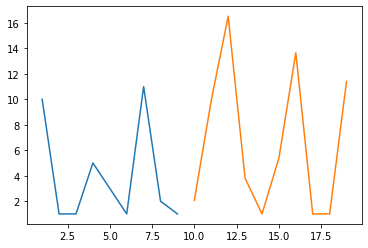

In [49]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data[-9:])
plt.plot(day_pred,list2)